<h1> Module 6 : </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import re
import warnings
import sklearn.cluster
warnings.filterwarnings("ignore")


<h3> Question 1 : </h3>

In [2]:
filenames = glob.glob('Module 6/*.csv')
def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$',     '',    filename)
file=[]
for f in filenames:
    file.append(getName(f))
final_list=[]
for f in file:
    f=f.lstrip('Module 6\\')
    final_list.append(f)
    
len(final_list)


30

In [3]:
def read_csv( filename ):
    if isinstance(filename, pd.DataFrame): return filename  # OPTIMIZATION: allow passthrough of existing dataframe

    dataframe = pd.read_csv( filename, parse_dates=['Date'] )
    dataframe.set_index( 'Date', inplace=True )
    return dataframe


In [4]:
filenames = glob.glob('Module 6/*.csv')
portfolio_df=pd.DataFrame()
portfolio_df.reset_index()
def define_df(file_list,filenames):
    i=0
    for file in file_list:
        portfolio_df[file]=pd.read_csv(filenames[i])['Close Price']
        data=pd.read_csv(filenames[i],parse_dates=['Date'])
        i=i+1
    return portfolio_df
portfolio_df=define_df(final_list,filenames)  
portfolio_df

,AJANTPHARM,IDFC,GMRINFRA,DRREDDY,BOMDYEING,DHFL,ADANIPOWER,EXIDEIND,ASIANPAINT,EICHERMOT,...,CASTROLIND,CIPLA,BERGEPAINT,BAJAJELEC,BPCL,AXISBANK,BAJFINANCE,GAIL,HDFC,ADANIPORTS
0,1633.50,63.70,17.55,2675.80,82.20,431.40,30.25,245.80,1148.05,28930.60,...,449.85,569.00,259.50,341.15,727.85,500.10,1332.95,414.00,1559.50,356.20
1,1634.25,64.25,17.40,2724.10,83.40,1009.90,32.85,244.70,1142.85,29362.50,...,443.00,565.60,261.50,347.00,733.30,501.50,1347.75,411.40,205.00,354.50
2,1654.35,63.35,17.30,2736.90,82.25,1055.20,33.10,243.20,1154.95,29093.55,...,439.55,562.35,260.90,349.85,727.45,502.80,1324.80,408.30,1566.55,348.55
3,1633.40,61.50,16.75,2678.95,78.95,1070.00,31.90,239.85,1151.35,28357.30,...,433.95,560.10,254.10,334.10,714.90,492.00,1314.55,404.75,1552.50,347.90
4,1670.25,61.15,16.95,2656.45,77.15,1050.00,32.40,238.15,1123.15,27936.05,...,437.10,564.95,247.80,336.20,702.45,501.70,1289.15,401.05,207.00,349.45
5,1677.95,60.20,16.80,2608.70,74.00,1072.28,31.45,230.80,1112.55,27189.90,...,424.95,563.10,249.15,313.25,695.60,502.30,1242.15,390.20,1537.05,354.45
6,1676.80,58.25,15.90,2579.45,70.45,1149.00,29.85,227.05,1098.90,27598.25,...,411.90,533.20,244.10,315.55,699.55,500.60,1233.75,380.35,201.50,331.65
7,1657.45,56.90,14.55,2516.80,66.95,1040.60,28.00,222.15,1091.20,27364.70,...,418.80,519.65,242.45,327.95,711.90,499.30,1224.35,390.65,1520.60,339.65
8,1616.15,57.60,15.20,2427.70,69.85,1043.00,28.65,227.80,1113.20,28009.45,...,414.45,504.00,242.65,346.20,726.85,507.45,1258.85,401.00,195.00,340.75
9,1602.15,59.25,15.95,2414.40,73.00,1062.15,28.90,233.35,1132.45,28351.35,...,420.50,488.90,258.00,359.45,749.65,511.45,1317.80,401.75,1519.85,348.00


<h3> Question 2 : </h3>

In [5]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio_df.shape[1])
    return normalize_weights( weights )

weights = random_weights()
weights

array([ 0.003003  ,  0.02102102,  0.05005005,  0.04904905,  0.01801802,
        0.00600601,  0.03903904,  0.04404404,  0.06706707,  0.002002  ,
        0.05905906,  0.04504505,  0.01001001,  0.02202202,  0.03903904,
        0.06606607,  0.04004004,  0.04204204,  0.01201201,  0.01301301,
        0.01501502,  0.03503504,  0.01201201,  0.06206206,  0.02702703,
        0.05105105,  0.02102102,  0.00600601,  0.05905906,  0.06406406])

In [6]:
working_days_per_year    = 252
portfolio_summary = pd.DataFrame()
portfolio_summary['Returns']    = portfolio_df.pct_change().mean() * working_days_per_year
portfolio_summary['Volatility'] = portfolio_df.pct_change().std()  * np.sqrt( working_days_per_year )
final_portfolio = portfolio_summary
portfolio_summary

,Returns,Volatility
AJANTPHARM,-0.173891,0.332171
IDFC,-0.200489,0.353990
GMRINFRA,0.043816,0.479169
DRREDDY,0.085396,0.297678
BOMDYEING,0.327621,0.602869
DHFL,27.851587,8.424197
ADANIPOWER,0.305273,0.610532
EXIDEIND,-0.051484,0.262985
ASIANPAINT,0.101249,0.209406
EICHERMOT,-0.136246,0.294935


<h3> Question 3 : </h3>

In [9]:
from sklearn.cluster import KMeans
kn = range(1,20)
li = []
for i in kn:
    m = KMeans(n_clusters = i)
    m.fit_predict(portfolio_summary[["Returns", "Volatility"]])
    a = m.inertia_
    li.append(a)

plt.figure(figsize = (10,4))
plt.plot(kn,li)

<h4>By looking at the Elbow Curve, we are taking two values of k = 3 and 7</h4>

In [10]:
from matplotlib import cm

cmap = cm.get_cmap('Set1') # Colour map (there are many others)
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)

In [11]:
portfolio_kmeans ={}

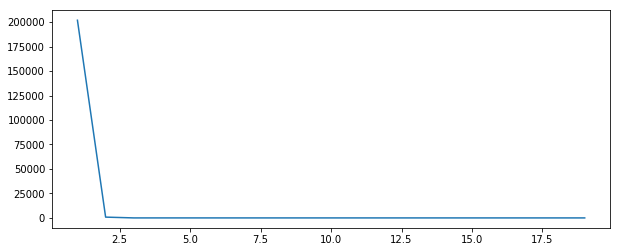

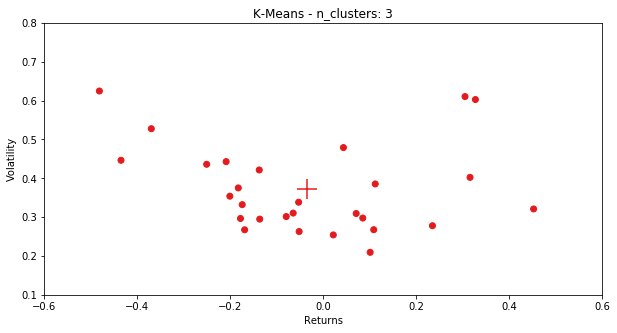

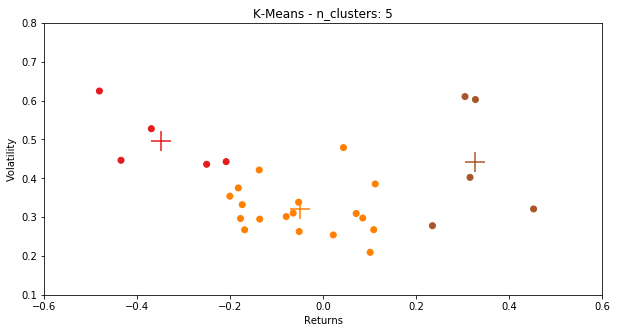

In [12]:
for i in [3,5]:
    plt.figure(figsize = (10,5))
    portfolio_kmeans[i]      = KMeans(n_clusters=i, random_state=0).fit(portfolio_summary)
    portfolio_kmeans_predict = portfolio_kmeans[i].predict(portfolio_summary)

    plt.scatter(portfolio_summary.Returns, portfolio_summary.Volatility, c=get_color(portfolio_kmeans_predict))
    plt.ylim(0.1, 0.8)
    plt.xlim(-0.60, 0.60)
    plt.title('K-Means - n_clusters: ' + str(i))
    plt.xlabel('Returns')
    plt.ylabel('Volatility')
    # Mark Cluster Centers
    for i, coords in enumerate( portfolio_kmeans[i].cluster_centers_ ):
        plt.scatter( coords[0], coords[1], s=400, marker='+', c=[ get_color(i) ] )
    plt.show()

<h2> Final Plot : </h2>

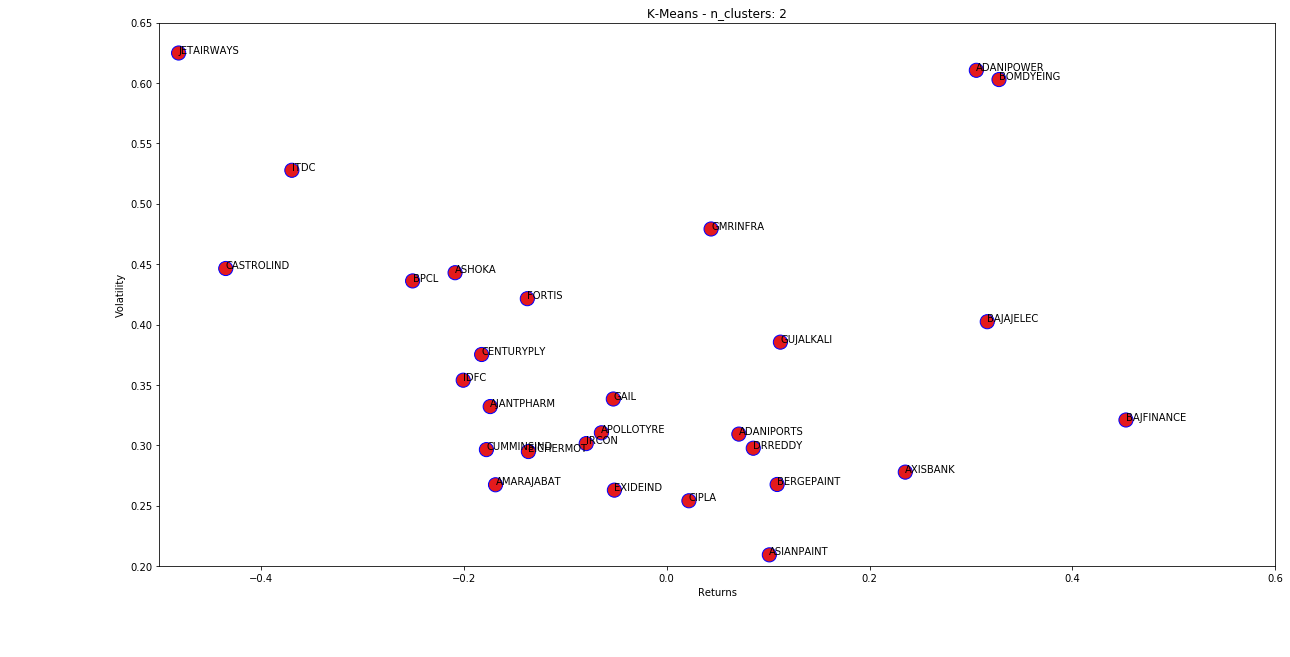

In [15]:
plt.figure(figsize = (20,10))
portfolio_kmeans[8]      = KMeans(n_clusters=2, random_state=0).fit(portfolio_summary)
portfolio_kmeans_predict = portfolio_kmeans[8].predict(portfolio_summary)

plt.scatter(portfolio_summary.Returns, portfolio_summary.Volatility, s = 200, edgecolors='b',
            c=get_color(portfolio_kmeans_predict))
plt.ylim(0.2, 0.65)
plt.xlim(-0.50, 0.60)
plt.title('K-Means - n_clusters: ' + str(2))
plt.xlabel('Returns')
plt.ylabel('Volatility')
y = list(portfolio_summary["Returns"])
z = list(portfolio_summary["Volatility"])
for i, txt in enumerate(final_list):
    plt.annotate(txt, (y[i],z[i]))
plt.show()

In [16]:
for i in [3,5]:
    final_portfolio['cluster_'+str(i)] = portfolio_kmeans[i].predict( portfolio_summary[['Returns', 'Volatility']] )
# FINAL DATAFRAME - 
final_portfolio

,Returns,Volatility,cluster_3,cluster_5
AJANTPHARM,-0.173891,0.332171,0,3
IDFC,-0.200489,0.353990,0,3
GMRINFRA,0.043816,0.479169,0,3
DRREDDY,0.085396,0.297678,0,3
BOMDYEING,0.327621,0.602869,0,4
DHFL,27.851587,8.424197,2,2
ADANIPOWER,0.305273,0.610532,0,4
EXIDEIND,-0.051484,0.262985,0,3
ASIANPAINT,0.101249,0.209406,0,3
EICHERMOT,-0.136246,0.294935,0,3


<h1> MODULE 6 ENDS here, Thank You </h1>